In [310]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

import time

In [311]:
# to view the tweet text 
pd.set_option('display.max_colwidth', None)

# data gathering
* read from `twitter-archive-enhanced.csv`
* download `image_predictions.tsv`

* use tweepy to load
    - retweet count
    - like count
    - ...
* save tweater data to `tweet_json.txt` and load them as df

#### read from `twitter-archive-enhanced.csv`

In [312]:
# twitter_acrchive = pd.read_csv('twitter-archive-enhanced.csv')

#### download `image_predictions.tsv`

In [313]:
# response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [314]:
# with open('image_predictions.tsv','wb') as file:
#     file.write(response.content)

# image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

* use tweepy to load
    - retweet count
    - like count
    - ...


In [315]:
# consumer_key = 'YOUR CONSUMER KEY'
# consumer_secret = 'YOUR CONSUMER SECRET'
# access_token = 'YOUR ACCESS TOKEN'
# access_secret = 'YOUR ACCESS SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

## http://docs.tweepy.org/en/v3.2.0/api.html#API

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

- https://tweepy.readthedocs.io/en/latest/api.html#API.get_status
- http://docs.tweepy.org/en/latest/extended_tweets.html?highlight=tweet_mode#extended-mode
- http://docs.tweepy.org/en/latest/extended_tweets.html?highlight=tweet_mode#examples

In [316]:
# for tweet_id in tweater_acrchive.tweet_id:
#     tweet = api.get_status(tweet_id, tweet_mode='extended')
#     print(tweet.text)
#     break

* save tweater data to `tweet-json.txt` 
* convert data to dict then to df

In [317]:
# ## temporary
# rows = []
# with open('tweet-json.txt','r') as json_file:
#     for line in json_file.readlines():
#         data = json.loads(line)
#         data['favorite_count']
        
#         rows.append({'tweet_id': data['id'],
#                      'retweet_count':  data['retweet_count'],
#                      'favorite_count': data['favorite_count'],
#                      'hashtags': data['entities']['hashtags']})

In [318]:
# twitter_extra = pd.DataFrame(rows)

### save loaded data to csv

In [319]:
# image_predictions.to_csv('image_predictions.csv', index=False)
# twitter_extra.to_csv('twitter_extra.csv', index=False)

In [320]:
## loading shortcut
twitter_acrchive =  pd.read_csv('twitter-archive-enhanced.csv')
image_predictions =  pd.read_csv('image_predictions.csv')
twitter_extra =  pd.read_csv('twitter_extra.csv')

# Assessing Data

### check any error in rating , dog stages

quate
```
I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages .
```




In [321]:
calculated_score =  twitter_acrchive.rating_numerator.astype(str) + '/' + twitter_acrchive.rating_denominator.astype(str)

In [322]:
tweete_score = twitter_acrchive.text.str.extract(r'(\d+\/\d+)')[0]

In [323]:
twitter_acrchive.loc[calculated_score!=tweete_score,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10


* `835246439529840640` ratings at end of text

* `826598799820865537` is  comment , the rated was in other post

https://twitter.com/dog_rates/status/826598799820865537

In [324]:
twitter_acrchive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [325]:
small_rate = twitter_acrchive[twitter_acrchive.rating_numerator < 10]

In [326]:
small_rate[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


* rating with fraction has mistakes

In [327]:
small_dem = twitter_acrchive[twitter_acrchive.rating_denominator < 10]
small_dem[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


* 810984652412424192 not rating 
* 666287406224695296 rating at the end

In [328]:
##  already reported
big_dem = twitter_acrchive[twitter_acrchive.rating_numerator > 20]
big_dem[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


### check other column

In [329]:
twitter_acrchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


- complex values[url, string] in source coloumn 

In [330]:
twitter_acrchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- stages`[doggo , floofer ..]` and name columns use string `None` or `none` to represent null value
- wrong dtypes: `[timestamp,retweeted_status_timestamp]`
- dog type in represented in multiple columns (doggo  floofer pupper puppo)
- column source is not descriptive


In [331]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- image prediction multible coulmns for beard `hard todo analysis`


In [332]:
image_predictions[~image_predictions.p1_dog & ~image_predictions.p2_dog & ~image_predictions.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


* some images has no dogs

* programitically extract score for multible image tweats is requires manula image inspection

# ROUND 1
### messy
- tweet extra has related data to tweater_archive
- dog type in represented in column name name (doggo  floofer pupper puppo)
- name column `source`  is not descriptive
- image prediction multible coulmns for beard `hard todo analysis`
* dog bread to tweate


### dirty
* tweater_archive
    - complex values in source coloumn 
    - tweat `[826598799820865537 , 810984652412424192 ]` is not rating tweete
    - rating with fraction takes fraction only _ex.. `9.5/10` is saved as `5/10`_
    - tweets with two rating like value at begining and other at the end 
    ex..` [835246439529840640, 666287406224695296] `
    - `181` tweats that have retweet_status
    - `78` replays
    ```
    You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
    ```
    - stages[doggo , floofer ..] and name columns use string `None` or `none` to represent null value

    - wrong dtypes
        * tweater_archive: timestamp,retweeted_status_timestamp
* image preditictions
    - some images has no dogs
    - dog bread is catagorial dtype
# ROUND 2 _after cleaning
### dirty
- some dogs has multipe types


    


# cleanning

## make copy

In [333]:
twitter_acrchive_clean =  twitter_acrchive.copy()
twitter_extra_clean = twitter_extra.copy()
image_predictions_clean = image_predictions.copy()

## tidness issues

### tweet extra has related data to twitter_archive

solution:
* merge the two data frames with tweet_id

In [334]:
twitter_acrchive_clean = twitter_acrchive_clean.merge(twitter_extra, on='tweet_id')


## test

In [335]:
twitter_acrchive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### dog type is represented in column name (doggo  floofer pupper puppo)

solution:
- create column type that holds this value 
- drop those columns 

In [336]:
id_list = list(twitter_acrchive_clean.columns)
dog_types = ['doggo','floofer','pupper','puppo']
id_list = [x for x in id_list if x not in dog_types]

dog_type = twitter_acrchive_clean.melt(id_vars=id_list,value_name='dog_type')
dog_type = dog_type[['tweet_id','dog_type']]

In [337]:

dog_type = dog_type[dog_type.dog_type != 'None']
twitter_acrchive_clean = twitter_acrchive_clean.merge(dog_type,on='tweet_id',how='left')

In [338]:
twitter_acrchive_clean.drop(columns=dog_types, inplace=True)

# test

In [339]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2368 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2368 non-null   object 
 4   source                      2368 non-null   object 
 5   text                        2368 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2309 non-null   object 
 10  rating_numerator            2368 non-null   int64  
 11  rating_denominator          2368 non-null   int64  
 12  name                        2368 non-null   object 
 13  retweet_count               2368 

### image prediction represent  beard in multible coulmns

* take the most confidant dog bread
    1. change false in `p1,p2,p3` coulmns with null
    2. use `combine` to get columns with non null value betwean `p1,p2`
    3. reapeat 2 for `last_result,p3`
    4. drop useless coulmns

In [340]:
# replace false breed with null
image_predictions_clean.loc[~image_predictions_clean.p1_dog,['p1']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p1_dog,['p1_conf']] = np.nan


image_predictions_clean.loc[~image_predictions_clean.p2_dog,['p2']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p2_dog,['p2_conf']] = np.nan

image_predictions_clean.loc[~image_predictions_clean.p3_dog,['p3']] = np.nan
image_predictions_clean.loc[~image_predictions_clean.p3_dog,['p3_conf']] = np.nan

In [341]:
# choose non false breed p1,p2
image_predictions_clean['breed'] = image_predictions_clean.p1.combine_first(image_predictions_clean.p2)
image_predictions_clean['breed_confidance'] = image_predictions_clean.p1_conf.combine_first(image_predictions_clean.p2_conf)

In [342]:
# choose non false breed last_result,p3
image_predictions_clean['breed'] = image_predictions_clean.breed.combine_first(image_predictions_clean.p3)
image_predictions_clean['breed_confidance'] = image_predictions_clean.breed_confidance.combine_first(image_predictions_clean.p3_conf)

* naming was missy

In [343]:
image_predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                       inplace=True)

## test

In [344]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   breed             1751 non-null   object 
 4   breed_confidance  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


-------------------------------------
# dirty data
* the count increased from `2356` to `2368` 
    - some dogs has multipe types

## column source is not descriptive
- rename to `source_device`

In [123]:
twitter_acrchive_clean.rename(columns={'source':'source_device'}, inplace=True)

In [124]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2368 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2368 non-null   object 
 4   source_device               2368 non-null   object 
 5   text                        2368 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2309 non-null   object 
 10  rating_numerator            2368 non-null   int64  
 11  rating_denominator          2368 non-null   int64  
 12  name                        2368 non-null   object 
 13  retweet_count               2368 

# ditry data
###  complex values in source coloumn 
- select text in <h> tag body 
- convert to simpler values

In [125]:
tweete_source = twitter_acrchive_clean.source_device.str.extract(r'(>.*<)')[0]

In [126]:
twitter_acrchive_clean.source_device = tweete_source.str[1:-1]


In [127]:
map_simple_source = {
    'Twitter for iPhone' : 'iPhone',
    'Twitter Web Client' : 'Web Client',
    'Vine - Make a Scene' : 'Vine',
    'TweetDeck' : 'TweetDeck'
}
twitter_acrchive_clean.source_device.replace(map_simple_source, inplace=True)

## test 

In [128]:
twitter_acrchive_clean.source_device.value_counts()

iPhone        2232
Vine            92
Web Client      33
TweetDeck       11
Name: source_device, dtype: int64

### rating problems
#### rating with fraction takes fraction only _ex.. `9.5/10` is saved as `5/10`_


### sol:
* use regex expration that take the point into acount

observed cases:
    - 9.5/10 
    - ...10/10 
    - 13/10

In [129]:
tweete_score = twitter_acrchive_clean.text.str.extract(r'(\d+\.?\d*\/\d+\.?\d*)')[0]

In [130]:
twitter_acrchive_clean[['rating_numerator','rating_denominator']] =  tweete_score.str.split('/',expand=True).astype(float)

## test

In [131]:
twitter_acrchive_clean.loc[twitter_acrchive_clean.rating_numerator%1!=0,
                           ['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
44,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
341,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10.0
700,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
770,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1701,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1724,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### tweets with rating like value at begining and right rating at the end 

* extract all and take last one

In [132]:
match_all = twitter_acrchive_clean.text.str.extractall(r'(\d+\.?\d*\/\d+\.?\d*)')

In [133]:
messy_rating = twitter_acrchive_clean.iloc[match_all.xs(1,level=1).index]

In [134]:
messy_rating = messy_rating[['text','rating_numerator','rating_denominator']]

## double rating cases
- two dogs
- 24/7
- joking then rate
- 10/10
- contain date 4/20
### sol:
- igonre tweetes 
    - if tweete contain `and` consider two doges and take the first one only
    - 10/10 
- select last
    - 24/7
    - 4/20
    - joking  
    select rating at the end from match_all

In [135]:
# ignore tweets with and ` find return negative value`
messy_rating = messy_rating[(messy_rating.text.str.find('and') < 0) &
                            (messy_rating.text.str.find('&') < 0) &
                            (messy_rating.text.str.find('10/10') < 0) ]

In [136]:
second_valid = match_all.xs(1,level=1).loc[messy_rating.index][0]
second_index = second_valid.index
second_nom_dem = second_valid.str.split('/',expand=True).astype(float)

twitter_acrchive_clean.loc[second_index,['rating_numerator']] = second_nom_dem[0]
twitter_acrchive_clean.loc[second_index,['rating_denominator']] = second_nom_dem[1]


# test

In [137]:
twitter_acrchive_clean.loc[messy_rating.index, ['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
54,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13.0,10.0
314,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10.0
868,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,11.0,10.0
1177,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1214,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1471,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10.0
1982,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,11.0,10.0
2347,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


## sames to be not problem as image df has tweets without them
### `181` tweats that have retweet_status,  `78` replays

In [138]:
# twitter_acrchive_clean.drop(labels=)

# retweet_index = twitter_acrchive_clean[twitter_acrchive_clean.retweeted_status_id.notnull()].index
# replay_index = twitter_acrchive_clean[twitter_acrchive_clean.in_reply_to_status_id.notnull()].index
# twitter_acrchive_clean.drop(labels=retweet_index.append(replay_index),inplace=True)


In [139]:
twitter_acrchive_clean[['text','name']].sample(10)

,text,name
1206,This is Skittle. He's trying to communicate. 11/10 solid effort https://t.co/6WTfJvtKx6,Skittle
307,Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE,None
1988,This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq,Pumpkin
1074,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,just
1595,Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN,None
2189,"Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp",None
907,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",Lilli
1933,This is Gus. He's super stoked about being an elephant. Couldn't be happier. 9/10 for elephant pupper https://t.co/gJS1qU0jP7,Gus
2206,This is Ruffles. He is an Albanian Shoop Da Whoop. He just noticed the camera. Patriotic af. Classy hardwood. 11/10 https://t.co/HyDpTU5Jhj,Ruffles
1686,Meet Jax. He's an Iglesias Hufflepoof. Quite the jokester. Takes it too far sometimes. Can be very hurtful. 9/10 https://t.co/i5TeG0KYcW,Jax


## wrong dtypes
    * timedate: timestamp,retweeted_status_timestamp
    * catagorial : dog_type ,source_device
    * ? HASH_tags

In [140]:
twitter_acrchive_clean.timestamp = pd.to_datetime(twitter_acrchive_clean.timestamp)
twitter_acrchive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_acrchive_clean.retweeted_status_timestamp)
twitter_acrchive_clean.dog_type = twitter_acrchive_clean.dog_type.astype('category')
twitter_acrchive_clean.source_device = twitter_acrchive_clean.source_device.astype('category')

## test

In [141]:
twitter_acrchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2368 non-null   int64              
 1   in_reply_to_status_id       79 non-null     float64            
 2   in_reply_to_user_id         79 non-null     float64            
 3   timestamp                   2368 non-null   datetime64[ns, UTC]
 4   source_device               2368 non-null   category           
 5   text                        2368 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2309 non-null   object             
 10  rating_numerator            2368 non-null   float64         

# dog names
# first dog bread _with true

# analysis
- avrage rating for dog types, dogbreed
- most retweated/loved type
- is rating random ? 
- value count for types
- do people agree ? the likes compared to rating
- number of photos effect

In [142]:
means_by_type = twitter_acrchive_clean.groupby('dog_type').mean()
means_by_type = means_by_type[['rating_numerator','retweet_count','favorite_count']]

In [143]:
means_by_type

,rating_numerator,retweet_count,favorite_count
dog_type,,,
doggo,11.804124,7295.494845,15345.010309
floofer,11.800000,4083.600000,11674.900000
pupper,10.829180,2982.199219,6750.996094
puppo,12.133333,6581.133333,18225.900000


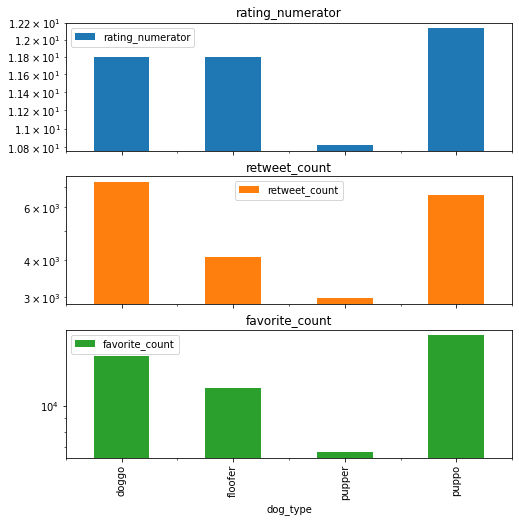

In [144]:
means_by_type.plot.bar(subplots=True,figsize=(8,8),logy=True);

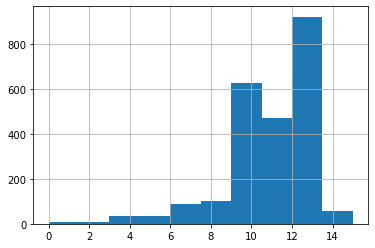

In [145]:
twitter_acrchive_clean.rating_numerator[twitter_acrchive_clean.rating_numerator < 20].hist();

* seems scwed a bit the right but overall seems a normal distubtion not random values

## value count for types

In [146]:
twitter_acrchive_clean.dog_type.value_counts()

pupper     256
doggo       97
puppo       30
floofer     10
Name: dog_type, dtype: int64

In [147]:
twitter_acrchive_clean.groupby(['source_device','dog_type']).count()['tweet_id']

source_device  dog_type
TweetDeck      doggo         1.0
               floofer       NaN
               pupper        1.0
               puppo         NaN
Vine           doggo         7.0
               floofer       2.0
               pupper       17.0
               puppo         1.0
Web Client     doggo         NaN
               floofer       NaN
               pupper        2.0
               puppo         NaN
iPhone         doggo        89.0
               floofer       8.0
               pupper      236.0
               puppo        29.0
Name: tweet_id, dtype: float64